In [405]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

In [206]:
clockdiv=8
fs = 125000000/clockdiv
wavelen = int( fs/ 20)
wavelen

781250

578.7037037037037

In [433]:
wv = np.zeros(512, dtype=int)
alpha = 0.3
beta = 0.5
wv[0] = wavelen//512
for i in range(len(wv)-1):
    wv[i+1] = math.ceil(wv[i] * alpha)
    alpha = alpha * (1 - beta)
    beta *= 0.99
    # print(alpha)
    if alpha >= 0.99:
        wv[i+1] = wv[0]
        alpha = 0.4
print(wv)

[1525  458   69    6    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1 

In [345]:
def getStream(n, counts):
    x = np.zeros(n)
    state=0
    cc=0
    count = 0
    i = 0
    while 1:
        # print(count)
        x[i] = state
        count = count + 1
        if count == counts[cc]:
            count = 0
            # print("reset")
            if state == 0:
                state = 1
            else:
                state = 0
                cc = (cc + 1) % len(counts)
            # print(state)
        i = i + 1
        if (i == n):
            break
    return x

# a = getStream(int(fs//2), [wavelen//2, wavelen//64,wavelen//3, wavelen//64,wavelen//4, wavelen//64])
# a = getStream(int(fs//2), [wavelen//2])
a = getStream(int(fs//2), wv)
# a = getStream(10, [2])
           

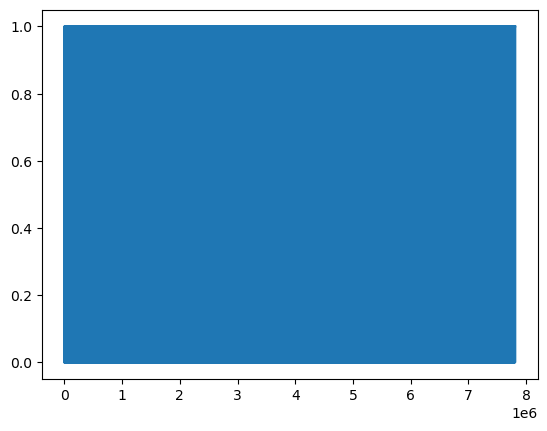

In [346]:
plt.step(np.arange(len(a)),a)

In [347]:
from scipy import signal
sos = signal.butter(4, 20000, 'lp', fs=fs, output='sos')

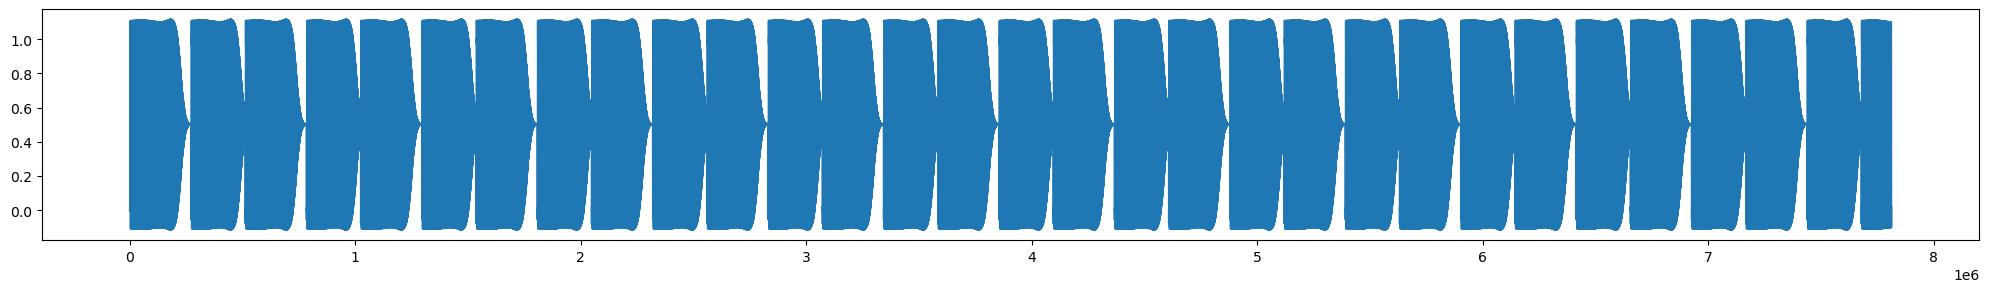

In [348]:
plt.figure(figsize=(25, 3))
filtered = signal.sosfilt(sos, a)
plt.plot(filtered[:])

In [349]:
from scipy.signal import resample_poly
downsample = fs // 48000
print(downsample)

325.0


In [350]:
a_ds = resample_poly(a, 1, downsample)
sr_ds = fs//downsample 

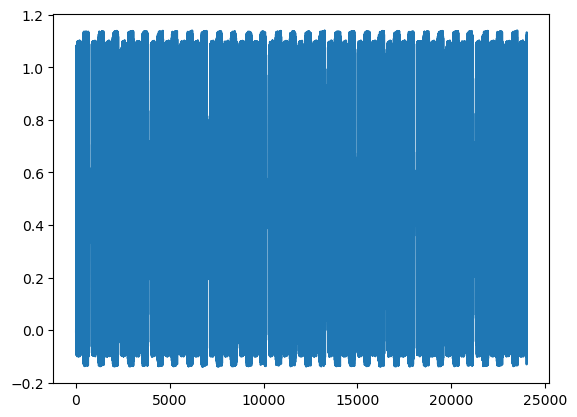

In [351]:
plt.plot(a_ds)

In [352]:
import librosa

In [353]:
C = np.abs(librosa.cqt(a_ds, sr=sr_ds))

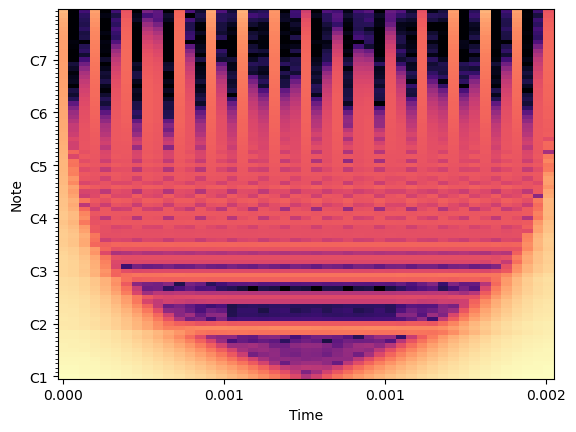

In [354]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=fs, x_axis='time', y_axis='cqt_note', ax=ax)

In [355]:
specmean = np.mean(C, axis=1)
specmean.shape

(84,)

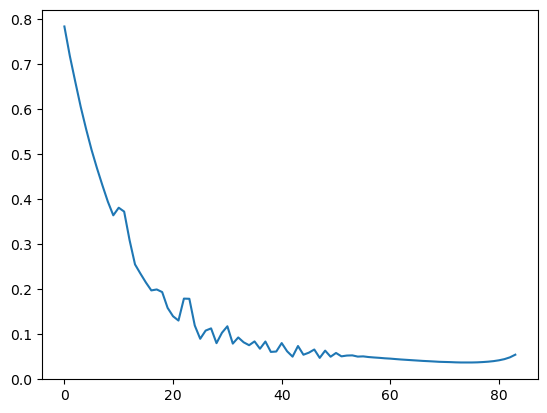

In [356]:
plt.plot(specmean)

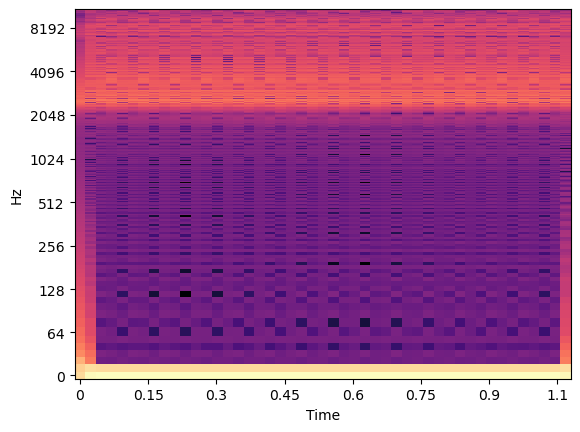

In [357]:
S = np.abs(librosa.stft(a_ds, n_fft=2048))
fig, ax = plt.subplots()
dbs=librosa.amplitude_to_db(S,
                                                       ref=np.max)
img = librosa.display.specshow(dbs,
                               y_axis='log', x_axis='time', ax=ax)

In [358]:
spec = dbs[:,0]
spec= specmean

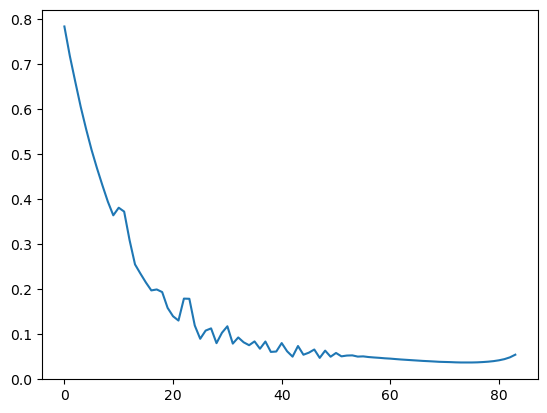

In [359]:
plt.plot(spec)

In [360]:
x = []
d = 2
for i in range(len(spec)//d):
    rng1 = spec[i*d:(i+1)*d]
    rng2 = spec[(i+1)*d:(i+3)*d]
    # print(np.mean(rng1), np.mean(rng2))
    x.append(np.mean(rng1)<np.mean(rng2))

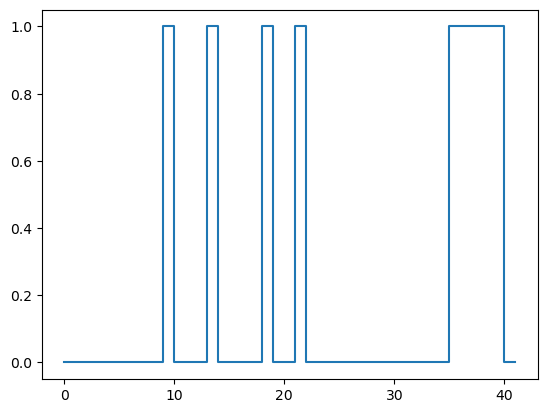

In [361]:
plt.step(np.arange(len(x)),x[:2000])

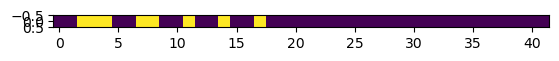

In [291]:
plt.imshow([x])